In [1]:
# imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

In [2]:
# generate Shortest Path problem grid
def spp_grid(nx: int, ny: int, p:float = 0.0, seed:int = 1234, min_reward:int=0, max_reward:int=10):
  np.random.seed(seed=seed)
  return pd.DataFrame(
    [
      [
        x+1, 
        y+1, 
        np.random.randint(min_reward, max_reward),
        False
      ]
      for x in range(nx)
      for y in range(ny)
  ], columns = ['x', 'y', 'reward', 'is_stolen'])

In [39]:
# generate line of houses
nx = 10
ny = 1
df = spp_grid(nx=nx, ny=ny, p=0.0, seed=13)

In [40]:
df

,x,y,reward,is_stolen
0,1,1,2,False
1,2,1,0,False
2,3,1,0,False
3,4,1,6,False
4,5,1,2,False
5,6,1,4,False
6,7,1,9,False
7,8,1,3,False
8,9,1,4,False
9,10,1,2,False


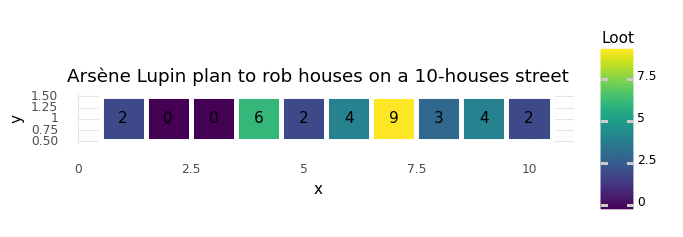

<ggplot: (8788978463669)>

In [41]:
# plot it
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y', fill='reward'), color='white', size=2) + 
    geom_text(aes(x='x', y='y', label='reward'))+
    # scale_fill_viridis_c(option="mako", begin=0.2) +
    coord_equal() +
    theme_minimal() +
    labs(title = "Arsène Lupin plan to rob houses on a 10-houses street", fill = "Loot")
)

In [44]:
def get_max_loot(data):
    '''
    Computes the maximum loot given a dataframe that represents a street
    that Arsène Lupin plans to rob.

    Parameters
    ----------
    data: pd.DataFrame
        dataframe representing a street where the columns are x, y and reward for each house
    '''
    # odd and even houses
    even_rewards = []
    odd_rewards = []
    for house_index, house in data.iterrows():
        if house_index % 2:
            even_rewards.append(house['reward'])
        else:
            odd_rewards.append(house['reward'])
    max_even = sum(even_rewards)
    max_odd = sum(odd_rewards)
    max_odd_even = max(max_even, max_odd)
    
    # slidding window
    windows = []
    for window in pd.Series(data.index).rolling(window=3, min_periods=3, center=True):
        if len(window) >= 3:
            windows.append(window.to_list())
    # print(windows)
    slidding_window = []
    reward_window = [data.loc[windows[i]]['reward'].to_list() for i in range(len(windows))]
    # print(reward_window)
    for index, reward in enumerate(reward_window):
        max_sub_window = max(reward)
        # print("index", index, "sub-index", reward.index(max_sub_window), "reward", max_sub_window)
        if index == 0:
            last_index = 0
            slidding_window.append(max_sub_window)
        elif index == last_index + 3:
            last_index = index
            slidding_window.append(max_sub_window)
    
    max_slidding_window = max(slidding_window)
    return max(max_odd_even, max_slidding_window)
    

get_max_loot(data=df)


17

In [ ]:
def get_max_loot(data):
    '''
    Computes the maximum loot given a dataframe that represents a street
    that Arsène Lupin plans to rob.

    Parameters
    ----------
    data: pd.DataFrame
        dataframe representing a street where the columns are x, y and reward for each house
    '''
    even_rewards = []
    odd_rewards = []
    for house_index, house in data.iterrows():
        if house_index % 2:
            even_rewards.append(house['reward'])
        else:
            odd_rewards.append(house['reward'])
    return even_rewards, odd_rewards

get_max_loot(data=df)


In [ ]:
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y', fill='p_stuck', color='is_terminal'), size=2) + 
    geom_text(aes(x='x', y='y', label='action'))+
    coord_equal() +
    theme_seaborn() +
    labs(title = "Shortest path problem, on a 5x5 grid", color = "End ?", fill = "P(stuck)")
)